In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RoscaMitrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
carer = pd.read_csv("./carer/data.csv")
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
carer["label"] = carer["label"].map(emotion_map)
carer = carer[carer["label"] != "love"]
carer

,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
6,i am one of those people who feels like going ...,joy
...,...,...
416804,that was what i felt when i was finally accept...,joy
416805,i take every day as it comes i m just focussin...,fear
416806,i just suddenly feel that everything was fake,sadness
416807,im feeling more eager than ever to claw back w...,joy


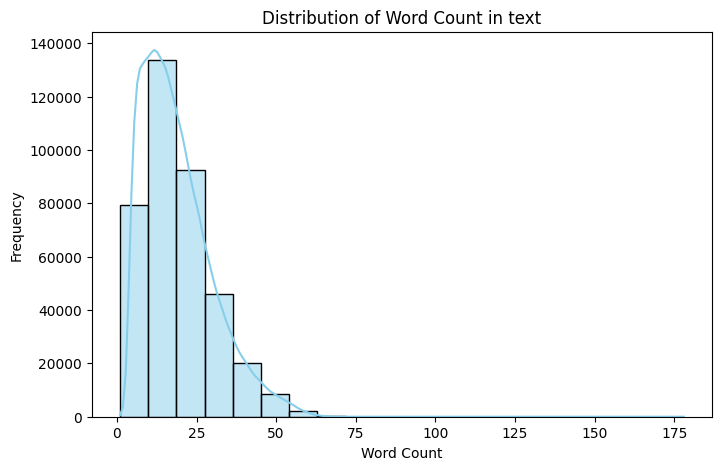

In [6]:
def calculate_word_count(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

def plot_word_count_histograms(dataframe, columns):
    for col in columns:
        dataframe[f"{col}_word_count"] = dataframe[col].apply(calculate_word_count)
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[f"{col}_word_count"], bins=20, kde=True, color="skyblue")
        plt.title(f"Distribution of Word Count in {col}")
        plt.xlabel("Word Count")
        plt.ylabel("Frequency")
        plt.show()

text_columns = ["text"]
plot_word_count_histograms(carer, text_columns)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RoscaMitrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


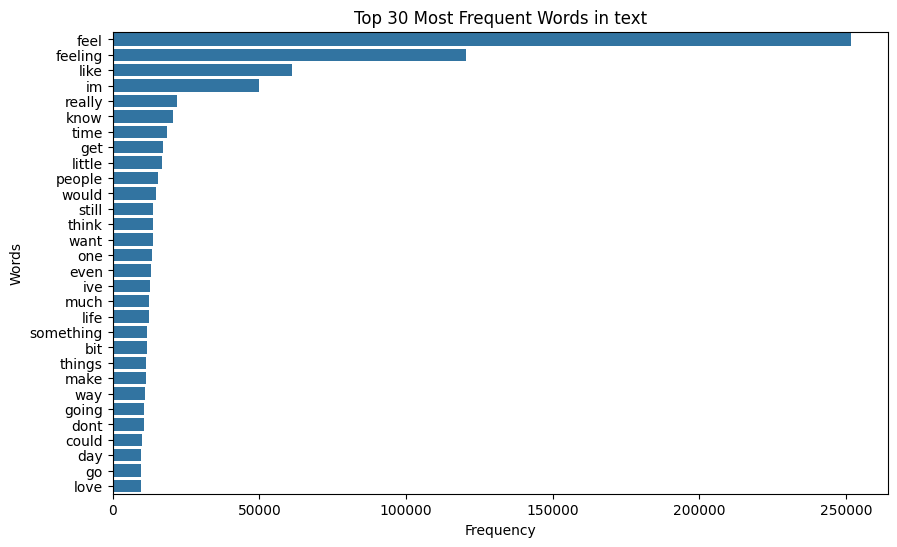

In [ ]:
def calculate_word_frequencies(text, stop_words):
    if isinstance(text, str):
        words = text.lower().split()
        # Remove stopwords from the words
        words = [word for word in words if word not in stop_words]
        return Counter(words)
    return Counter()

def plot_top_20_words(dataframe, columns):
    # Get stopwords from nltk
    stop_words = set(stopwords.words('english'))
    
    for col in columns:
        # Aggregate all words in the column
        all_words = []
        for text in dataframe[col]:
            all_words.extend(calculate_word_frequencies(text, stop_words).keys())
        
        # Get the 20 most common words
        word_counts = Counter(all_words).most_common(30)
        
        # Separate words and counts
        words, counts = zip(*word_counts)
        
        # Plot the top 20 most frequent words
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(words))
        plt.title(f"Top 30 Most Frequent Words in {col}")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.show()

# Example usage
text_columns = ["text"]
plot_top_20_words(carer, text_columns)


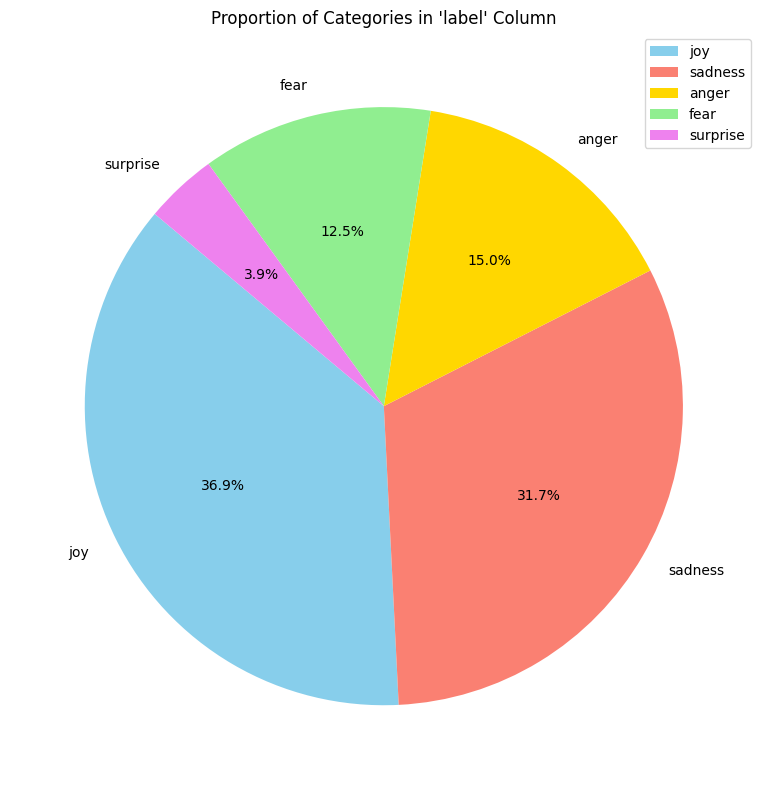

In [15]:
def plot_average_proportions_pie(dataframe, column):
    # Count the occurrences of each category
    category_counts = dataframe[column].value_counts()
    
    # Plot the proportions
    plt.figure(figsize=(8, 8))
    category_counts.plot(
        kind="pie",
        autopct="%1.1f%%", 
        colors=["skyblue", "salmon", "gold", "lightgreen", "violet"],  # Custom colors for each label
        startangle=140,
        legend=True
    )
    plt.title("Proportion of Categories in 'label' Column")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

column_name = "label"
plot_average_proportions_pie(carer, column_name)
